### 워드 클라우드를 위한 사전 세팅

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt # 차트를 그리기 위한 matplotlib을 임포트
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import os

## 교육/온라인 교육 테마주
링크 : http://m.infostock.co.kr/sector/sector_detail.asp?code=52&theme=%uAD50%uC721/%uC628%uB77C%uC778%20%uAD50%uC721&mode=w

In [3]:
df = pd.read_html('http://m.infostock.co.kr/sector/sector_detail.asp?code=52&theme=%uAD50%uC721/%uC628%uB77C%uC778%20%uAD50%uC721&mode=w')[1]
df = df[3:]
df

,0,1
3,관련종목,테마편입사유
4,- 메가스터디 (072870),"입시 교육 업체인 메가엠디㈜, 메가스터디교육㈜ 지분 보유."
5,- 청담러닝 (096240),오프라인 학원을 직영 및 가맹 형태로 운영하는 학원사업과 온/오프라인 교육 콘텐츠를...
6,- 디지털대성 (068930),"온라인 교육서비스 사업(대성마이맥 등), 교육 프랜차이즈 사업(대성N스쿨, 다수인 ..."
7,- 대교 (019680),"대교그룹 계열사로 학습지의 출판, 제조 및 판매를 주력 사업으로 영위중. 자회사 ㈜..."
8,- 웅진씽크빅 (095720),"씽크빅 브랜드의 학습지 교육문화사업(학습관리 서비스), 미래교육사업(독서관리 서비스..."
9,- NE능률 (053290),종합 교육서비스 전문기업. 초/중/고 및 성인용 영어학습 교재(교과서 포함)를 출판...
10,- 정상제이엘에스 (040420),오프라인 직영 학원(정상어학원)을 기반으로 초/중등생 대상의 영어교육사업을 영위하는...
11,- YBM넷 (057030),2000년 6월 출범해 이러닝 산업을 선도해온 국내 대표 온라인 교육기업. 온라인 ...
12,- 멀티캠퍼스 (067280),"삼성그룹 계열의 기업이러닝 전문업체. 기업, 공공기관을 대상으로 한 HR 컨설팅, ..."


In [4]:
col = df.iloc[0].to_list()
df.columns = col
df = df[1:]
df['관련종목'] = df['관련종목'].str.lstrip('- ')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,관련종목,테마편입사유
4,메가스터디 (072870),"입시 교육 업체인 메가엠디㈜, 메가스터디교육㈜ 지분 보유."
5,청담러닝 (096240),오프라인 학원을 직영 및 가맹 형태로 운영하는 학원사업과 온/오프라인 교육 콘텐츠를...
6,디지털대성 (068930),"온라인 교육서비스 사업(대성마이맥 등), 교육 프랜차이즈 사업(대성N스쿨, 다수인 ..."
7,대교 (019680),"대교그룹 계열사로 학습지의 출판, 제조 및 판매를 주력 사업으로 영위중. 자회사 ㈜..."
8,웅진씽크빅 (095720),"씽크빅 브랜드의 학습지 교육문화사업(학습관리 서비스), 미래교육사업(독서관리 서비스..."
9,NE능률 (053290),종합 교육서비스 전문기업. 초/중/고 및 성인용 영어학습 교재(교과서 포함)를 출판...
10,정상제이엘에스 (040420),오프라인 직영 학원(정상어학원)을 기반으로 초/중등생 대상의 영어교육사업을 영위하는...
11,YBM넷 (057030),2000년 6월 출범해 이러닝 산업을 선도해온 국내 대표 온라인 교육기업. 온라인 ...
12,멀티캠퍼스 (067280),"삼성그룹 계열의 기업이러닝 전문업체. 기업, 공공기관을 대상으로 한 HR 컨설팅, ..."
13,삼성출판사 (068290),"유아동 서적, 영어교재(유치원, 초등학원) 및 여성취미실용서적 등의 출판사업을 영위."


## 회사명과 종목 코드 얻기

In [5]:
dfstockcode = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,92220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
2445,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2446,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
2447,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2448,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [6]:
dfstockcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2450 non-null   object
 1   종목코드    2450 non-null   int64 
 2   업종      2450 non-null   object
 3   주요제품    2431 non-null   object
 4   상장일     2450 non-null   object
 5   결산월     2450 non-null   object
 6   대표자명    2450 non-null   object
 7   홈페이지    2270 non-null   object
 8   지역      2450 non-null   object
dtypes: int64(1), object(8)
memory usage: 172.4+ KB


In [7]:
dfstockcode.종목코드 = dfstockcode.종목코드.map('{:06d}'.format)
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,092220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
2445,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2446,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
2447,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2448,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [8]:
dfstockcode.to_csv('data/종목정보.csv', index=False, encoding='utf-8-sig')

In [9]:
stock_to_code = dict(zip(dfstockcode.회사명, dfstockcode.종목코드))

In [10]:
stock_to_code.get('삼성전자')

'005930'

## 종목별 뉴스 크롤링

In [11]:
url = 'https://finance.naver.com/item/news_news.nhn?code=005930&page=1'

In [12]:
source_code = requests.get(url).text
# source_code

In [13]:
html = BeautifulSoup(source_code,'html.parser')
titles = html.select('.title')
# print(titles)

In [14]:
title = re.sub('\n','',titles[0].get_text())
title

"7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠'"

In [15]:
titles[0].find('a')['href']

'/item/news_read.nhn?article_id=0004828983&office_id=009&code=005930&page=1&sm='

In [16]:
def news_crawler(company_name, max_page):
  df_result = None
  page = 1
  company_code = stock_to_code.get(company_name)
  if company_code is None:
    return print("회사 이름에 해당하는 종목코드가 없다!")
  url = 'https://finance.naver.com/item/news_news.nhn?code='+company_code
  while page<= int(max_page):
    source_code = requests.get("{}&page={}".format(url,page)).text
    html = BeautifulSoup(source_code,"lxml")

    # 뉴스 제목
    titles = html.select('.title')
    title_result = []
    for title in titles:
      title_result.append(re.sub('\n','',title.get_text()))

    # 뉴스 링크
    links = html.select('.title')
    link_result = []
    for link in links:
      add = 'https://finance.naver.com' + link.find('a')['href']
      link_result.append(add)

    # 변수들 합쳐서 해당 디렉토리에 csv파일로 저장하기 
    result= {"기사제목" : title_result, "링크" : link_result}
    df_temp = pd.DataFrame(result)
    
    if df_result is not None:
      df_result = pd.concat([df_result, df_temp])
    else:
      df_result = df_temp
    
    print(page,"페이지 진행 중")
    page += 1
  return df_result

In [17]:
company_name = '삼성전자'
df_result = news_crawler(company_name,10)
df_result

1 페이지 진행 중
2 페이지 진행 중
3 페이지 진행 중
4 페이지 진행 중
5 페이지 진행 중
6 페이지 진행 중
7 페이지 진행 중
8 페이지 진행 중
9 페이지 진행 중
10 페이지 진행 중


,기사제목,링크
0,"삼성전자 ""도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...
1,"삼성전자 ""캐나다 선수 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...
2,"삼성전자, 캐나다 선수가 메달 딸 때마다 1,000달러 기부",https://finance.naver.com/item/news_read.nhn?a...
3,"삼성전자, 도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부",https://finance.naver.com/item/news_read.nhn?a...
4,7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠',https://finance.naver.com/item/news_read.nhn?a...
...,...,...
5,"삼성만 때리는 공정위?…""급식 몰아줬다"" 2349억원 과징금, 법원 결...",https://finance.naver.com/item/news_read.nhn?a...
6,"삼성전자 ""실패 걱정없이 연구를""…AI·암호시스템 등 국가기술 키운다",https://finance.naver.com/item/news_read.nhn?a...
7,애플 샤오미 다 비켜…삼성 스마트폰 1위 칼 갈았다,https://finance.naver.com/item/news_read.nhn?a...
8,'갤폴드3' 가격 낮춘 삼성전자..'폴더블폰 대중화' 본격 시동,https://finance.naver.com/item/news_read.nhn?a...


### 본문 추출

In [18]:
!pip install newspaper3k

In [19]:
from newspaper import Article

In [20]:
df_result.iloc[0]['링크']

'https://finance.naver.com/item/news_read.nhn?article_id=0004943022&office_id=277&code=005930&page=1&sm='

In [21]:
# 파싱할 뉴스 주소
url = df_result.iloc[0]['링크']

# 기사가 한국어로 되어 있으니, language = 'ko'로 설정
article = Article(url, language='ko')

article.download()
article.parse()

In [22]:
# 기사 내용
print('기사 내용 :')
print(article.text)

기사 내용 :
삼성전자 캐나다 법인이 이번 도쿄 올림픽에서 캐나다 선수들이 메달을 딸 때마다 1000달러를 기부한다.25일 삼성전자 글로벌 뉴스룸에 따르면 삼성전자 캐나다법인은 캐나다 국가대표 선수가 메달을 획득할 때마다 캐나다 올림픽 재단에 1000달러를 기부할 계획이다. 기부 금액은 캐나다 스포츠 교육 프로그램 지원 등 스포츠 발전을 위해 사용된다.도쿄 올림픽 글로벌 파트너사인 삼성전자는 올해 캐나다 선수들이 목표한 최대 25개 메달 달성을 위해 최대 2만5000달러의 지원 금액을 약속한 바 있다.제프 조 삼성전자 캐나다법인 CEO는 "다음 세대 선수들에게 횃불을 전달하기 위해 더 큰 노력이 필요하다"며 "캐나다 선수들이 도쿄에서 성공적으로 경기를 치르기를 응원한다"고 말했다.데이비드 슈메이커 캐나다 올림픽위원회 사무총장도 "캐나다 선수들과 스포츠 프로그램을 지원해주기로 한 삼성전자의 결정에 매우 기쁘다"며 "올해 올림픽은 예년과 다르겠지만 선수들이 지원에 힘을 얻을 것"이라고 말했다.삼성전자는 1988년 서울 올림픽 지역 파트너로 시작해 1998년 일본 나가노 동계 올림픽부터 글로벌 파트너사로 참여하고 있다. 이번 도쿄 올림픽에서는 무선통신분야 공식 파트너사로 활동하며, 선수단 전원에게 최신 스마트폰 '갤럭시 S21 도쿄 2020 올림픽 에디션' 1만7000대를 제공하기도 했다.


In [23]:
def url_to_text(url):
  article = Article(url, language='ko')
  article.download()
  article.parse()
  return article.text

In [24]:
df_result['본문'] = df_result['링크'].apply(url_to_text)

In [25]:
df_result

,기사제목,링크,본문
0,"삼성전자 ""도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,삼성전자 캐나다 법인이 이번 도쿄 올림픽에서 캐나다 선수들이 메달을 딸 때마다 10...
1,"삼성전자 ""캐나다 선수 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,지난 23일 오후 일본 도쿄 국립경기장에서 열린 2020 도쿄올림픽 개막식에서 성화...
2,"삼성전자, 캐나다 선수가 메달 딸 때마다 1,000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,/삼성전자 글로벌 뉴스룸 /삼성전자 글로벌 뉴스룸\n\n삼성전자(005930)\n\...
3,"삼성전자, 도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,"삼성전자, 도쿄올림픽서 캐나다선수가 올림픽 메달 딸 때마다 1000달러 기부 (사진..."
4,7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠',https://finance.naver.com/item/news_read.nhn?a...,소재·부품·장비 주가 상승에\n\nKODEX반도체 올해 15% 쑥\n\n메모리 반도...
...,...,...,...
5,"삼성만 때리는 공정위?…""급식 몰아줬다"" 2349억원 과징금, 법원 결...",https://finance.naver.com/item/news_read.nhn?a...,\n\n\n\n━\n\n\n\n\n\n━\n\n\n\n\n\n\n\n\n\n━\n\...
6,"삼성전자 ""실패 걱정없이 연구를""…AI·암호시스템 등 국가기술 키운다",https://finance.naver.com/item/news_read.nhn?a...,과학강국 위해 1조5천억 출연\n\n2013년부터 기초과학·소재 지원\n\n\n\n...
7,애플 샤오미 다 비켜…삼성 스마트폰 1위 칼 갈았다,https://finance.naver.com/item/news_read.nhn?a...,"샤오미, 삼성과 점유율 2%포인트 차\n\n애플 '아이폰13' 역대급 판매량 예고\..."
8,'갤폴드3' 가격 낮춘 삼성전자..'폴더블폰 대중화' 본격 시동,https://finance.naver.com/item/news_read.nhn?a...,19일 이데일리TV 빅머니 1부 ‘기업 in 이슈’ 방송.\n\n[이데일리TV 김종...


In [26]:
df_result.isnull().sum()

기사제목    0
링크      0
본문      0
dtype: int64

In [27]:
df_result.dropna()

,기사제목,링크,본문
0,"삼성전자 ""도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,삼성전자 캐나다 법인이 이번 도쿄 올림픽에서 캐나다 선수들이 메달을 딸 때마다 10...
1,"삼성전자 ""캐나다 선수 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,지난 23일 오후 일본 도쿄 국립경기장에서 열린 2020 도쿄올림픽 개막식에서 성화...
2,"삼성전자, 캐나다 선수가 메달 딸 때마다 1,000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,/삼성전자 글로벌 뉴스룸 /삼성전자 글로벌 뉴스룸\n\n삼성전자(005930)\n\...
3,"삼성전자, 도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,"삼성전자, 도쿄올림픽서 캐나다선수가 올림픽 메달 딸 때마다 1000달러 기부 (사진..."
4,7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠',https://finance.naver.com/item/news_read.nhn?a...,소재·부품·장비 주가 상승에\n\nKODEX반도체 올해 15% 쑥\n\n메모리 반도...
...,...,...,...
5,"삼성만 때리는 공정위?…""급식 몰아줬다"" 2349억원 과징금, 법원 결...",https://finance.naver.com/item/news_read.nhn?a...,\n\n\n\n━\n\n\n\n\n\n━\n\n\n\n\n\n\n\n\n\n━\n\...
6,"삼성전자 ""실패 걱정없이 연구를""…AI·암호시스템 등 국가기술 키운다",https://finance.naver.com/item/news_read.nhn?a...,과학강국 위해 1조5천억 출연\n\n2013년부터 기초과학·소재 지원\n\n\n\n...
7,애플 샤오미 다 비켜…삼성 스마트폰 1위 칼 갈았다,https://finance.naver.com/item/news_read.nhn?a...,"샤오미, 삼성과 점유율 2%포인트 차\n\n애플 '아이폰13' 역대급 판매량 예고\..."
8,'갤폴드3' 가격 낮춘 삼성전자..'폴더블폰 대중화' 본격 시동,https://finance.naver.com/item/news_read.nhn?a...,19일 이데일리TV 빅머니 1부 ‘기업 in 이슈’ 방송.\n\n[이데일리TV 김종...


In [28]:
df_result.to_csv('data/{}.csv'.format(company_name), index=False, encoding='utf-8-sig')

In [29]:
loaded_df = pd.read_csv('data/{}.csv'.format(company_name))
loaded_df

,기사제목,링크,본문
0,"삼성전자 ""도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,삼성전자 캐나다 법인이 이번 도쿄 올림픽에서 캐나다 선수들이 메달을 딸 때마다 10...
1,"삼성전자 ""캐나다 선수 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,지난 23일 오후 일본 도쿄 국립경기장에서 열린 2020 도쿄올림픽 개막식에서 성화...
2,"삼성전자, 캐나다 선수가 메달 딸 때마다 1,000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,/삼성전자 글로벌 뉴스룸 /삼성전자 글로벌 뉴스룸\n\n삼성전자(005930)\n\...
3,"삼성전자, 도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,"삼성전자, 도쿄올림픽서 캐나다선수가 올림픽 메달 딸 때마다 1000달러 기부 (사진..."
4,7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠',https://finance.naver.com/item/news_read.nhn?a...,소재·부품·장비 주가 상승에\n\nKODEX반도체 올해 15% 쑥\n\n메모리 반도...
...,...,...,...
142,"삼성만 때리는 공정위?…""급식 몰아줬다"" 2349억원 과징금, 법원 결...",https://finance.naver.com/item/news_read.nhn?a...,\n\n\n\n━\n\n\n\n\n\n━\n\n\n\n\n\n\n\n\n\n━\n\...
143,"삼성전자 ""실패 걱정없이 연구를""…AI·암호시스템 등 국가기술 키운다",https://finance.naver.com/item/news_read.nhn?a...,과학강국 위해 1조5천억 출연\n\n2013년부터 기초과학·소재 지원\n\n\n\n...
144,애플 샤오미 다 비켜…삼성 스마트폰 1위 칼 갈았다,https://finance.naver.com/item/news_read.nhn?a...,"샤오미, 삼성과 점유율 2%포인트 차\n\n애플 '아이폰13' 역대급 판매량 예고\..."
145,'갤폴드3' 가격 낮춘 삼성전자..'폴더블폰 대중화' 본격 시동,https://finance.naver.com/item/news_read.nhn?a...,19일 이데일리TV 빅머니 1부 ‘기업 in 이슈’ 방송.\n\n[이데일리TV 김종...


## 워드 클라우드

### 명사추출

In [30]:
!pip install konlpy

KoNLPy에는 다양한 형태소 분석기가 존재하는데 그 중 하나인 Okt라는 형태소 분석기는 명사만 추출하는 기능을 제공

In [31]:
from konlpy.tag import Okt
tokenizer = Okt()

In [32]:
loaded_df['tokenized'] = loaded_df['본문'].apply(tokenizer.nouns)
loaded_df

,기사제목,링크,본문,tokenized
0,"삼성전자 ""도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,삼성전자 캐나다 법인이 이번 도쿄 올림픽에서 캐나다 선수들이 메달을 딸 때마다 10...,"[삼성, 전자, 캐나다, 법인, 이번, 도쿄, 올림픽, 캐나다, 선수, 메달, 딸,..."
1,"삼성전자 ""캐나다 선수 메달 딸 때마다 1000달러 기부""",https://finance.naver.com/item/news_read.nhn?a...,지난 23일 오후 일본 도쿄 국립경기장에서 열린 2020 도쿄올림픽 개막식에서 성화...,"[지난, 오후, 일본, 도쿄, 국립경기장, 도쿄올림픽, 개막식, 성화, 대가, 사진..."
2,"삼성전자, 캐나다 선수가 메달 딸 때마다 1,000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,/삼성전자 글로벌 뉴스룸 /삼성전자 글로벌 뉴스룸\n\n삼성전자(005930)\n\...,"[삼성, 전자, 글로벌, 뉴스룸, 삼성, 전자, 글로벌, 뉴스룸, 삼성, 전자, 일..."
3,"삼성전자, 도쿄올림픽서 캐나다가 메달 딸 때마다 1000달러 기부",https://finance.naver.com/item/news_read.nhn?a...,"삼성전자, 도쿄올림픽서 캐나다선수가 올림픽 메달 딸 때마다 1000달러 기부 (사진...","[삼성, 전자, 도쿄올림픽, 캐나다, 선수, 올림픽, 메달, 딸, 때, 기부, 사진..."
4,7만전자의 굴욕…삼성 빠진 반도체 ETF 수익률 '쏠쏠',https://finance.naver.com/item/news_read.nhn?a...,소재·부품·장비 주가 상승에\n\nKODEX반도체 올해 15% 쑥\n\n메모리 반도...,"[소재, 부품, 장비, 주가, 상승, 반도체, 올해, 쑥, 메모리, 반도체, 부동,..."
...,...,...,...,...
142,"삼성만 때리는 공정위?…""급식 몰아줬다"" 2349억원 과징금, 법원 결...",https://finance.naver.com/item/news_read.nhn?a...,\n\n\n\n━\n\n\n\n\n\n━\n\n\n\n\n\n\n\n\n\n━\n\...,"[육성, 공정, 거래, 위원회, 기업, 집단, 국장, 지난, 정부, 세종, 청사, ..."
143,"삼성전자 ""실패 걱정없이 연구를""…AI·암호시스템 등 국가기술 키운다",https://finance.naver.com/item/news_read.nhn?a...,과학강국 위해 1조5천억 출연\n\n2013년부터 기초과학·소재 지원\n\n\n\n...,"[과학, 강국, 위해, 출연, 기초과학, 소재, 지원, 스타트업, 요람, 랩, 운영..."
144,애플 샤오미 다 비켜…삼성 스마트폰 1위 칼 갈았다,https://finance.naver.com/item/news_read.nhn?a...,"샤오미, 삼성과 점유율 2%포인트 차\n\n애플 '아이폰13' 역대급 판매량 예고\...","[샤오미, 삼성, 점유, 율, 포인트, 차, 애플, 아이폰, 역대, 판매량, 예고,..."
145,'갤폴드3' 가격 낮춘 삼성전자..'폴더블폰 대중화' 본격 시동,https://finance.naver.com/item/news_read.nhn?a...,19일 이데일리TV 빅머니 1부 ‘기업 in 이슈’ 방송.\n\n[이데일리TV 김종...,"[이데일리, 빅머, 부, 기업, 이슈, 방송, 이데일리, 김종호, 기자, 이데일리,..."


### 단어의 등장 빈도수 파악

In [33]:
import numpy as np
from collections import Counter

In [34]:
tokenized_news = np.hstack(loaded_df['tokenized'].values)
news_word_count = Counter(tokenized_news)
print(news_word_count.most_common(10))

[('전자', 932), ('삼성', 736), ('등', 577), ('것', 487), ('기업', 415), ('반도체', 326), ('사업', 311), ('개', 300), ('수', 290), ('이', 273)]


### 위드 클라우드를 위한 전처리

In [35]:
loaded_df.tokenized.reset_index(drop=True)

0      [삼성, 전자, 캐나다, 법인, 이번, 도쿄, 올림픽, 캐나다, 선수, 메달, 딸,...
1      [지난, 오후, 일본, 도쿄, 국립경기장, 도쿄올림픽, 개막식, 성화, 대가, 사진...
2      [삼성, 전자, 글로벌, 뉴스룸, 삼성, 전자, 글로벌, 뉴스룸, 삼성, 전자, 일...
3      [삼성, 전자, 도쿄올림픽, 캐나다, 선수, 올림픽, 메달, 딸, 때, 기부, 사진...
4      [소재, 부품, 장비, 주가, 상승, 반도체, 올해, 쑥, 메모리, 반도체, 부동,...
                             ...                        
142    [육성, 공정, 거래, 위원회, 기업, 집단, 국장, 지난, 정부, 세종, 청사, ...
143    [과학, 강국, 위해, 출연, 기초과학, 소재, 지원, 스타트업, 요람, 랩, 운영...
144    [샤오미, 삼성, 점유, 율, 포인트, 차, 애플, 아이폰, 역대, 판매량, 예고,...
145    [이데일리, 빅머, 부, 기업, 이슈, 방송, 이데일리, 김종호, 기자, 이데일리,...
146    [국내, 최대, 사회, 복지, 사업, 나눔, 꿈, 로고, 국내, 최대, 사회, 복지...
Name: tokenized, Length: 147, dtype: object

In [36]:
temp_data = ' '.join(np.concatenate(loaded_df.tokenized.reset_index(drop=True)))
# temp_data

### 워드 클라우드

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

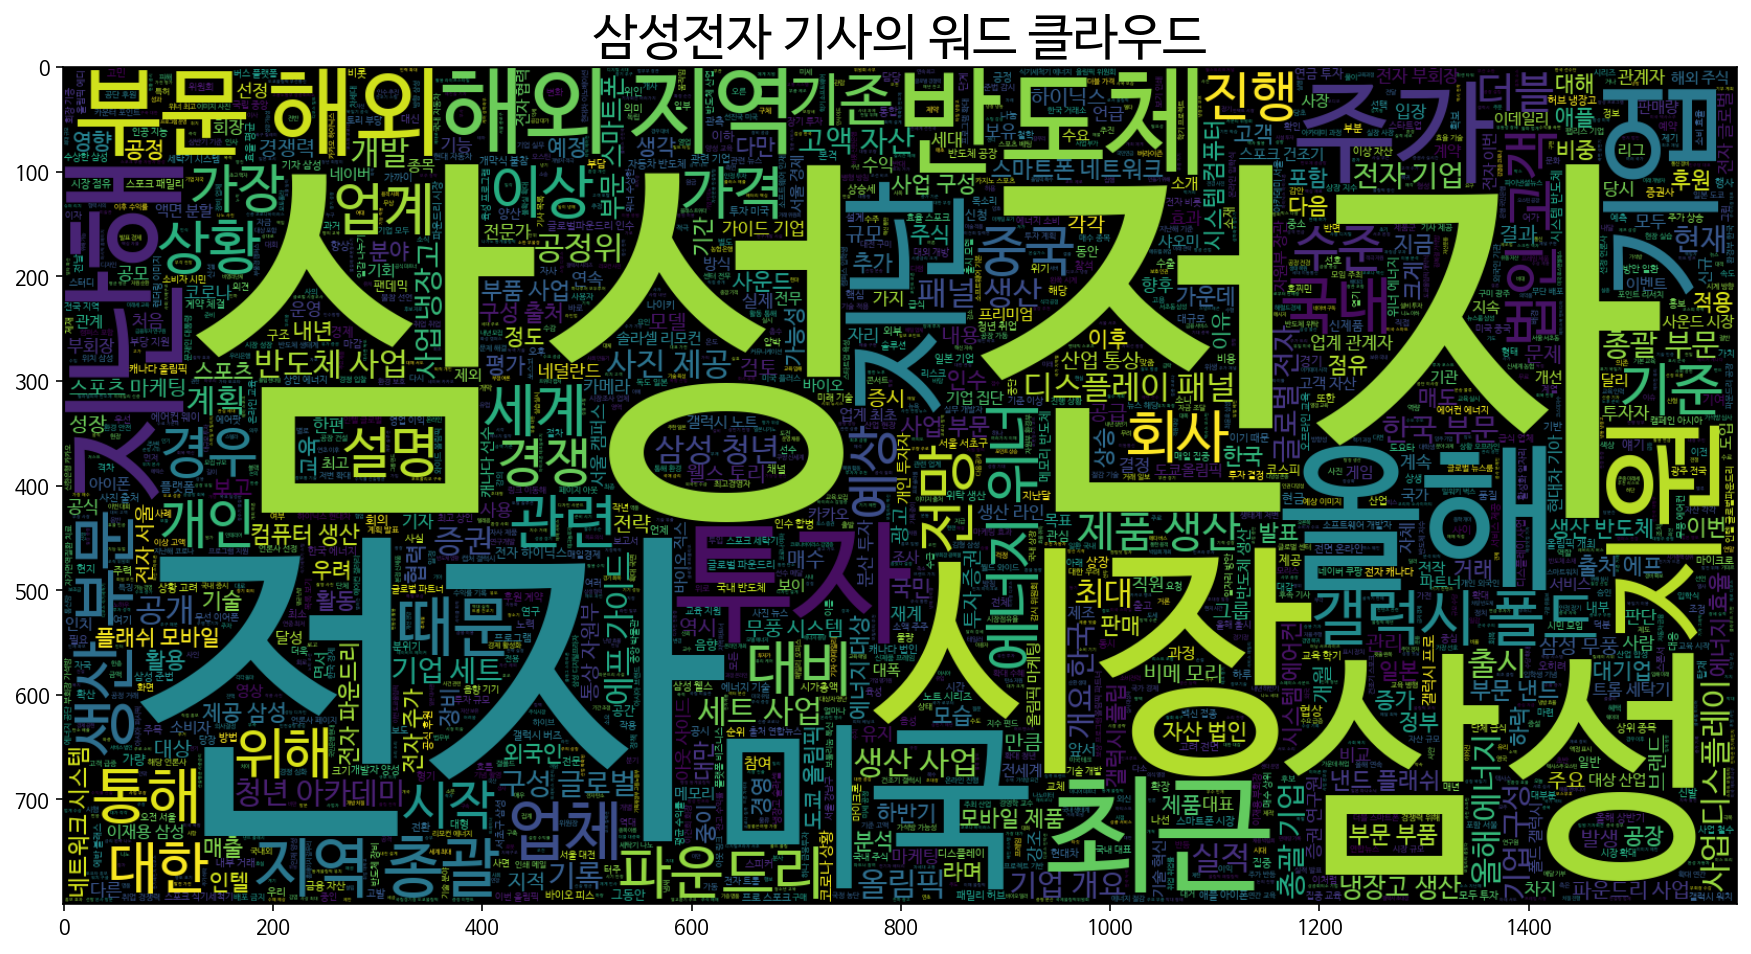

In [38]:
# 뉴스 기사의 워드클라우드
plt.figure(figsize = (15,15))
plt.title('{} 기사의 워드 클라우드'.format(company_name),fontsize=25)
temp_data = ' '.join(np.concatenate(loaded_df.tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

### 불용어 제거하기

링크에(https://bab2min.tistory.com/544) 있는 불용어 텍스트 파일 사용

In [39]:
with open('data/한국어불용어100.txt', 'r') as file:
	stop_word = file.readlines()
# stop_word

In [40]:
stop_word = [line.split('\t')[0] for line in stop_word]
# stop_word

In [41]:
temp_data = np.concatenate(loaded_df.tokenized.reset_index(drop=True))
len(temp_data)

43749

In [42]:
temp_data = list(filter(lambda x : x not in stop_word, temp_data))
len(temp_data)

40128

In [43]:
temp_data = ' '.join(np.concatenate(loaded_df.tokenized.reset_index(drop=True)))
# temp_data

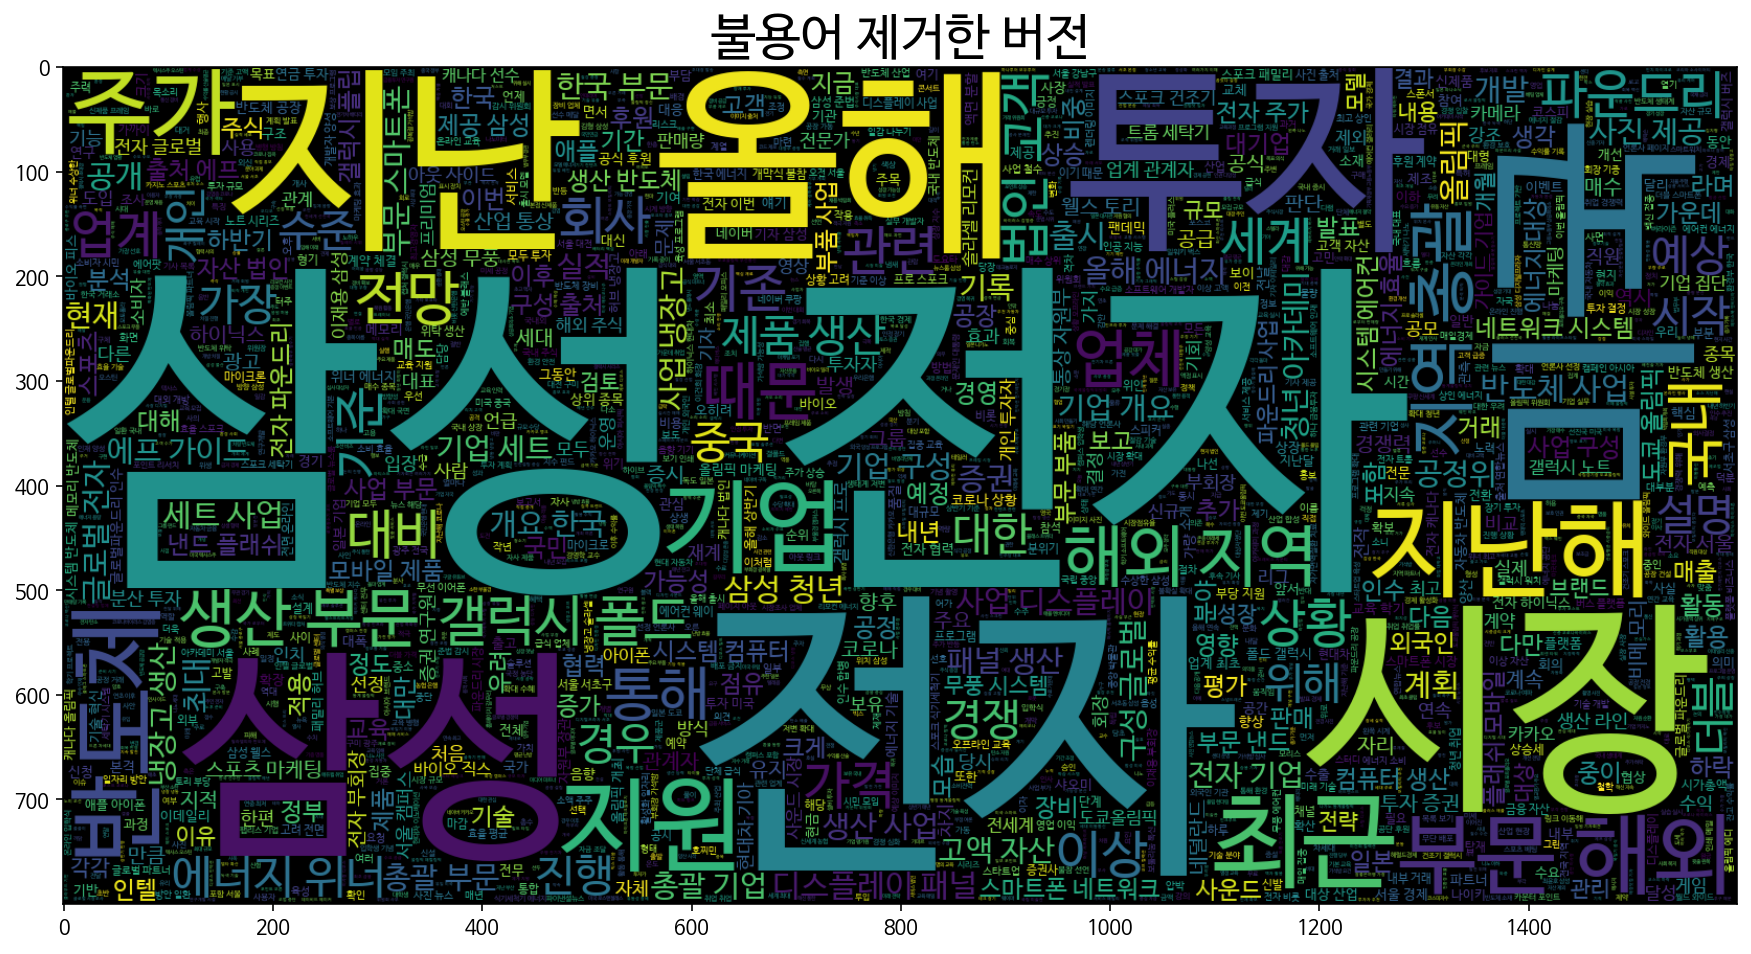

In [44]:
# 뉴스 기사의 워드클라우드
plt.figure(figsize = (15,15))
plt.title("불용어 제거한 버전",fontsize=25)
temp_data = ' '.join(np.concatenate(loaded_df.tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')